In [1]:
import pandas as pd
import numpy as np
from tslearn import barycenters
import matplotlib as mpl
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

In [10]:
#TODO Write a function to take a dataframe(index-agnostic) and calculate the Euclidean Barycentric Average for all the variables in the df.

def get_eba_from_df(df):
    ''''
    This assumes df has a column of the index which was auto set to 'Unnamed 0' as is the case
    when the user imports without explicitly specifying the date time column
    '''
    if df.columns.tolist()[0] == 'Unnamed: 0':
        df.rename(columns={'Unnamed: 0':'modified_index'}, inplace=True)
        df.set_index('modified_index', inplace=True)
    data_tranposed = df.to_numpy().T
    data_eba = barycenters.euclidean_barycenter(data_tranposed)
    data_eba_transposed = data_eba.transpose()
    data_with_eba = np.append(data_tranposed,data_eba_transposed, axis=0)
    data_cols_mod = df.columns.to_list()
    data_cols_mod.append('Euclidean Barycenter')
    data_eba_df = pd.DataFrame(data_with_eba.T,columns=data_cols_mod)
    data_eba_df.set_index(df.index,inplace=True)
    return data_eba_df

def plot_highlighted_eba(eba_df,title):
    '''
    Highlights the euclidean barycenter in read compred to the rest of the variables(in grey)
    '''
    # Create a list of the columns to plot
    columns = eba_df.columns.to_list()[:-1]
    plt.rcParams["figure.dpi"] = 300
    colors= ['#FFE355','#5d8abd','#a4fedb','#73a2c6','#68cbf8','#a5d5d8','#c5eddf']
    #colors = ["#8ecae6", "#219eba", "#023047", "#ffb703", "#fb8500", "#e07a5f", "#f28482"]



    # Set the color of the lines to light grey
    color = 'lightgrey'

    # Plot the lines
    for idx,col in enumerate(columns):
        #eba_df[col].plot(color=color)
        eba_df[col].plot(color=colors[idx])

    ax = eba_df['Euclidean Barycenter'].plot(color='#e71d36',xticks=range(0, len(eba_df), 4), figsize=(16, 6),rot=60)
    ax.grid(which='major',color='lightgrey')
    ax.legend(loc='lower right')

    # Set the title of the plot
    plt.title(title)

    # Show the plot
    plt.show()

In [8]:
jan_wk1_P_df = pd.read_csv('../data/subsequences/jan_wk1_P.csv')
jan_wk1_P_eba_df = get_eba_from_df(jan_wk1_P_df)
jan_wk1_P_eba_df.head()

,P-JW1-MON,P-JW1-TUE,P-JW1-WED,P-JW1-THU,P-JW1-FRI,P-JW1-SAT,P-JW1-SUN,Euclidean Barycenter
modified_index,,,,,,,,
00:00:00,3071.832,2877.704,3014.638,2947.298,2973.446,3029.978,3082.161,2999.579571
00:15:00,2978.160,2837.915,2927.678,2902.763,2887.630,3002.107,3002.023,2934.039429
00:30:00,2933.031,2818.541,2821.222,2784.637,2817.670,2967.794,2980.230,2874.732143
00:45:00,2878.928,2734.480,2781.378,2808.900,2796.380,2906.573,2915.397,2831.719429
01:00:00,2881.163,2739.832,2710.183,2751.774,2775.842,2857.319,2874.862,2798.710714


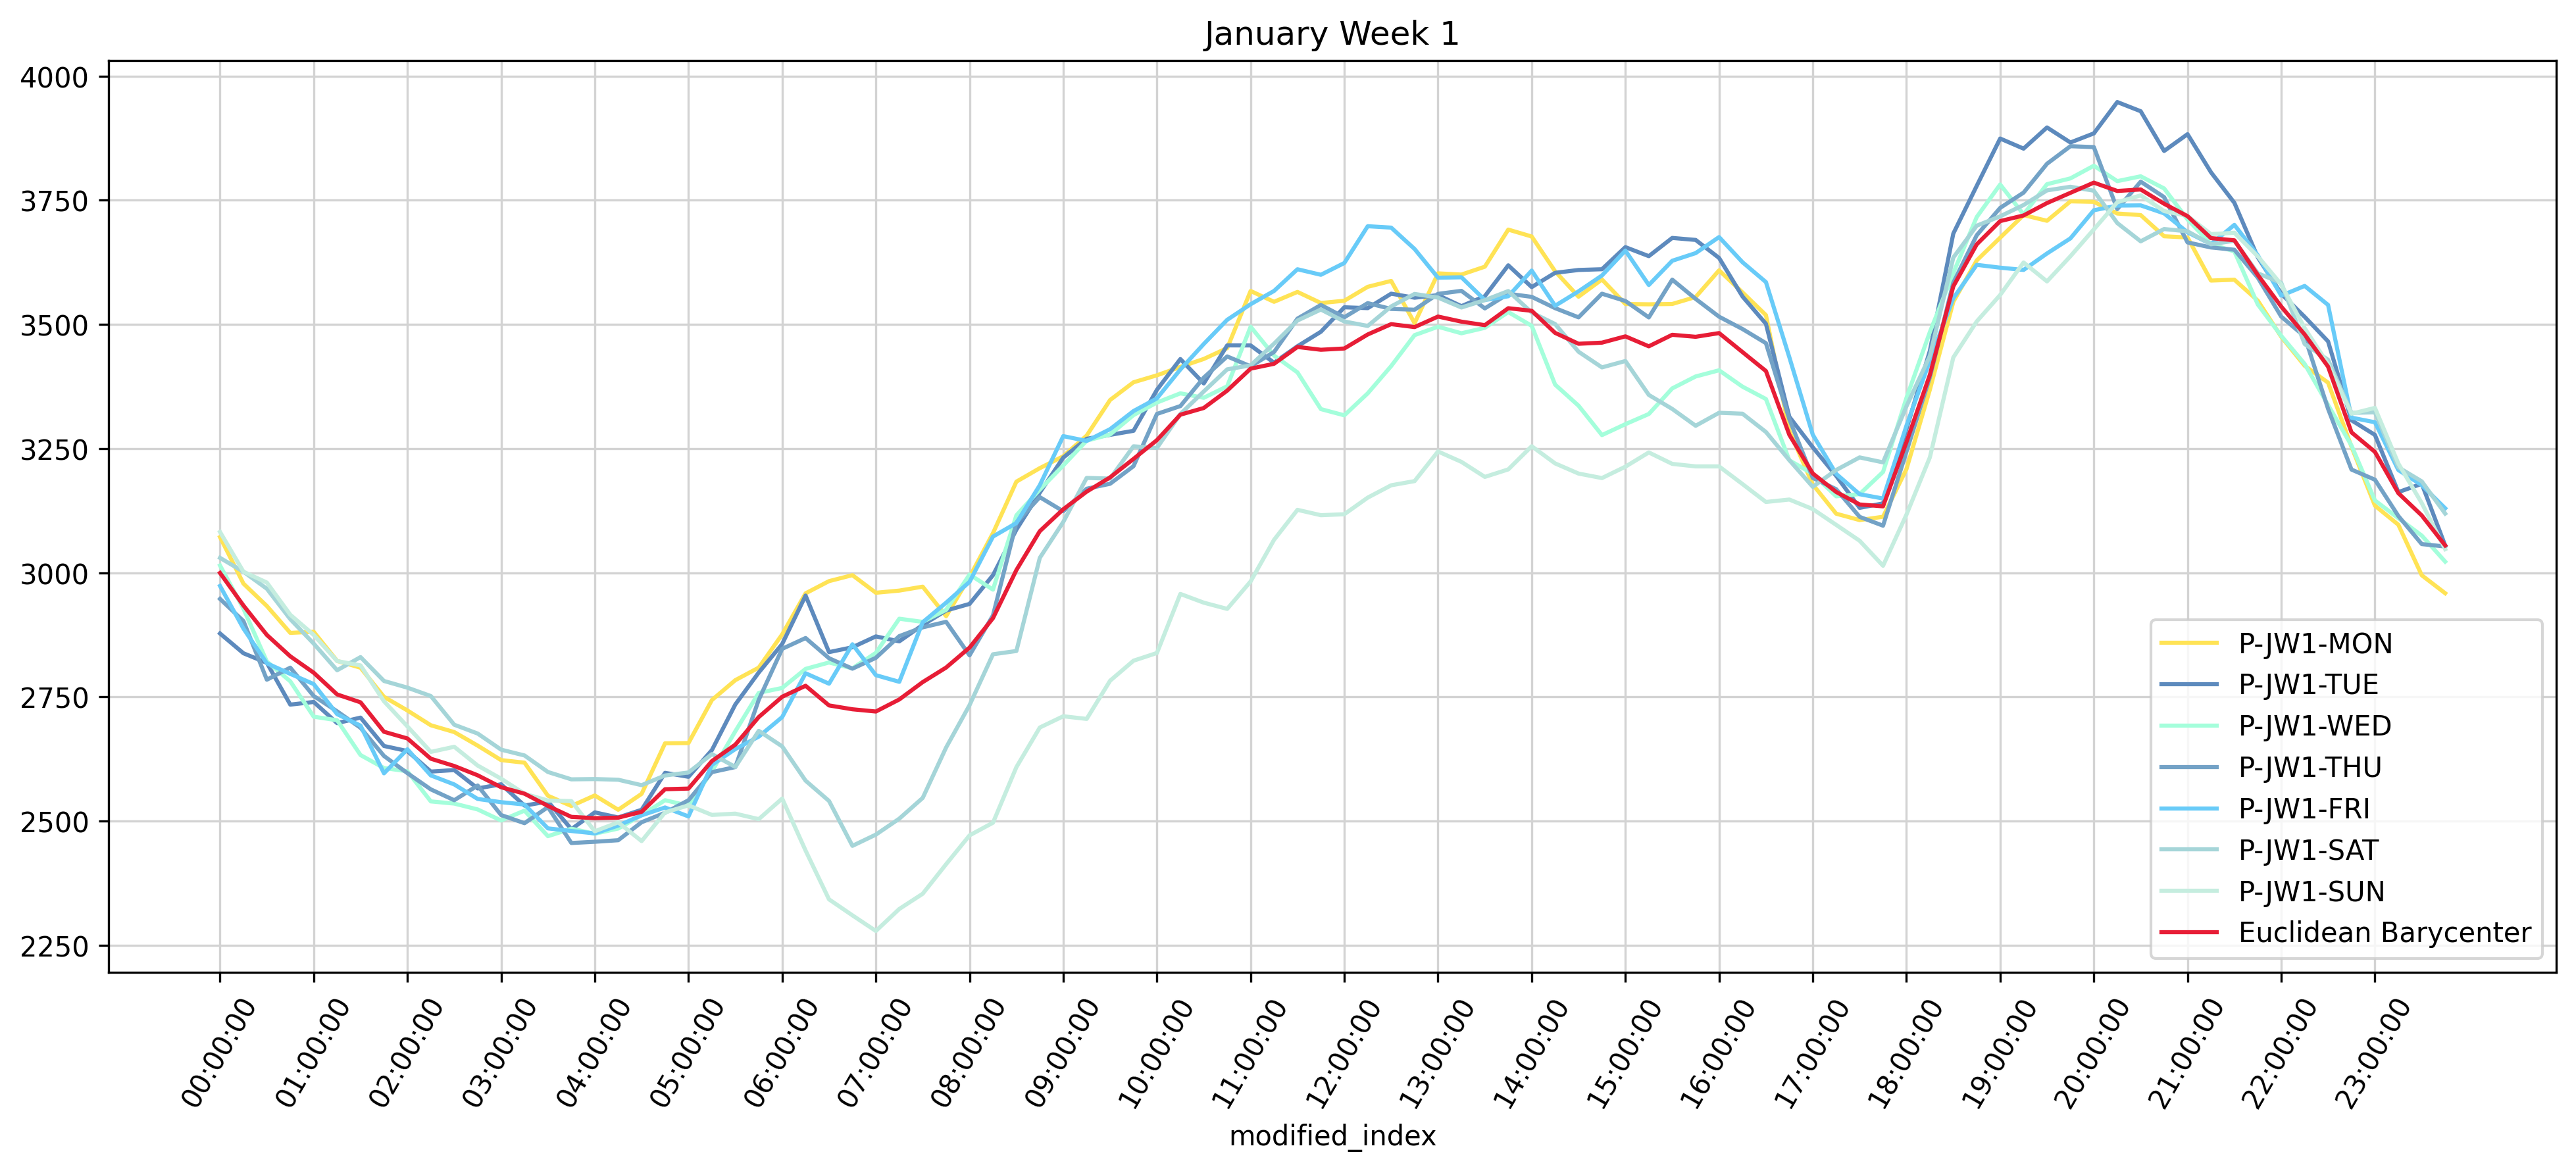

In [11]:
plot_highlighted_eba(eba_df=jan_wk1_P_eba_df,title="January Week 1")

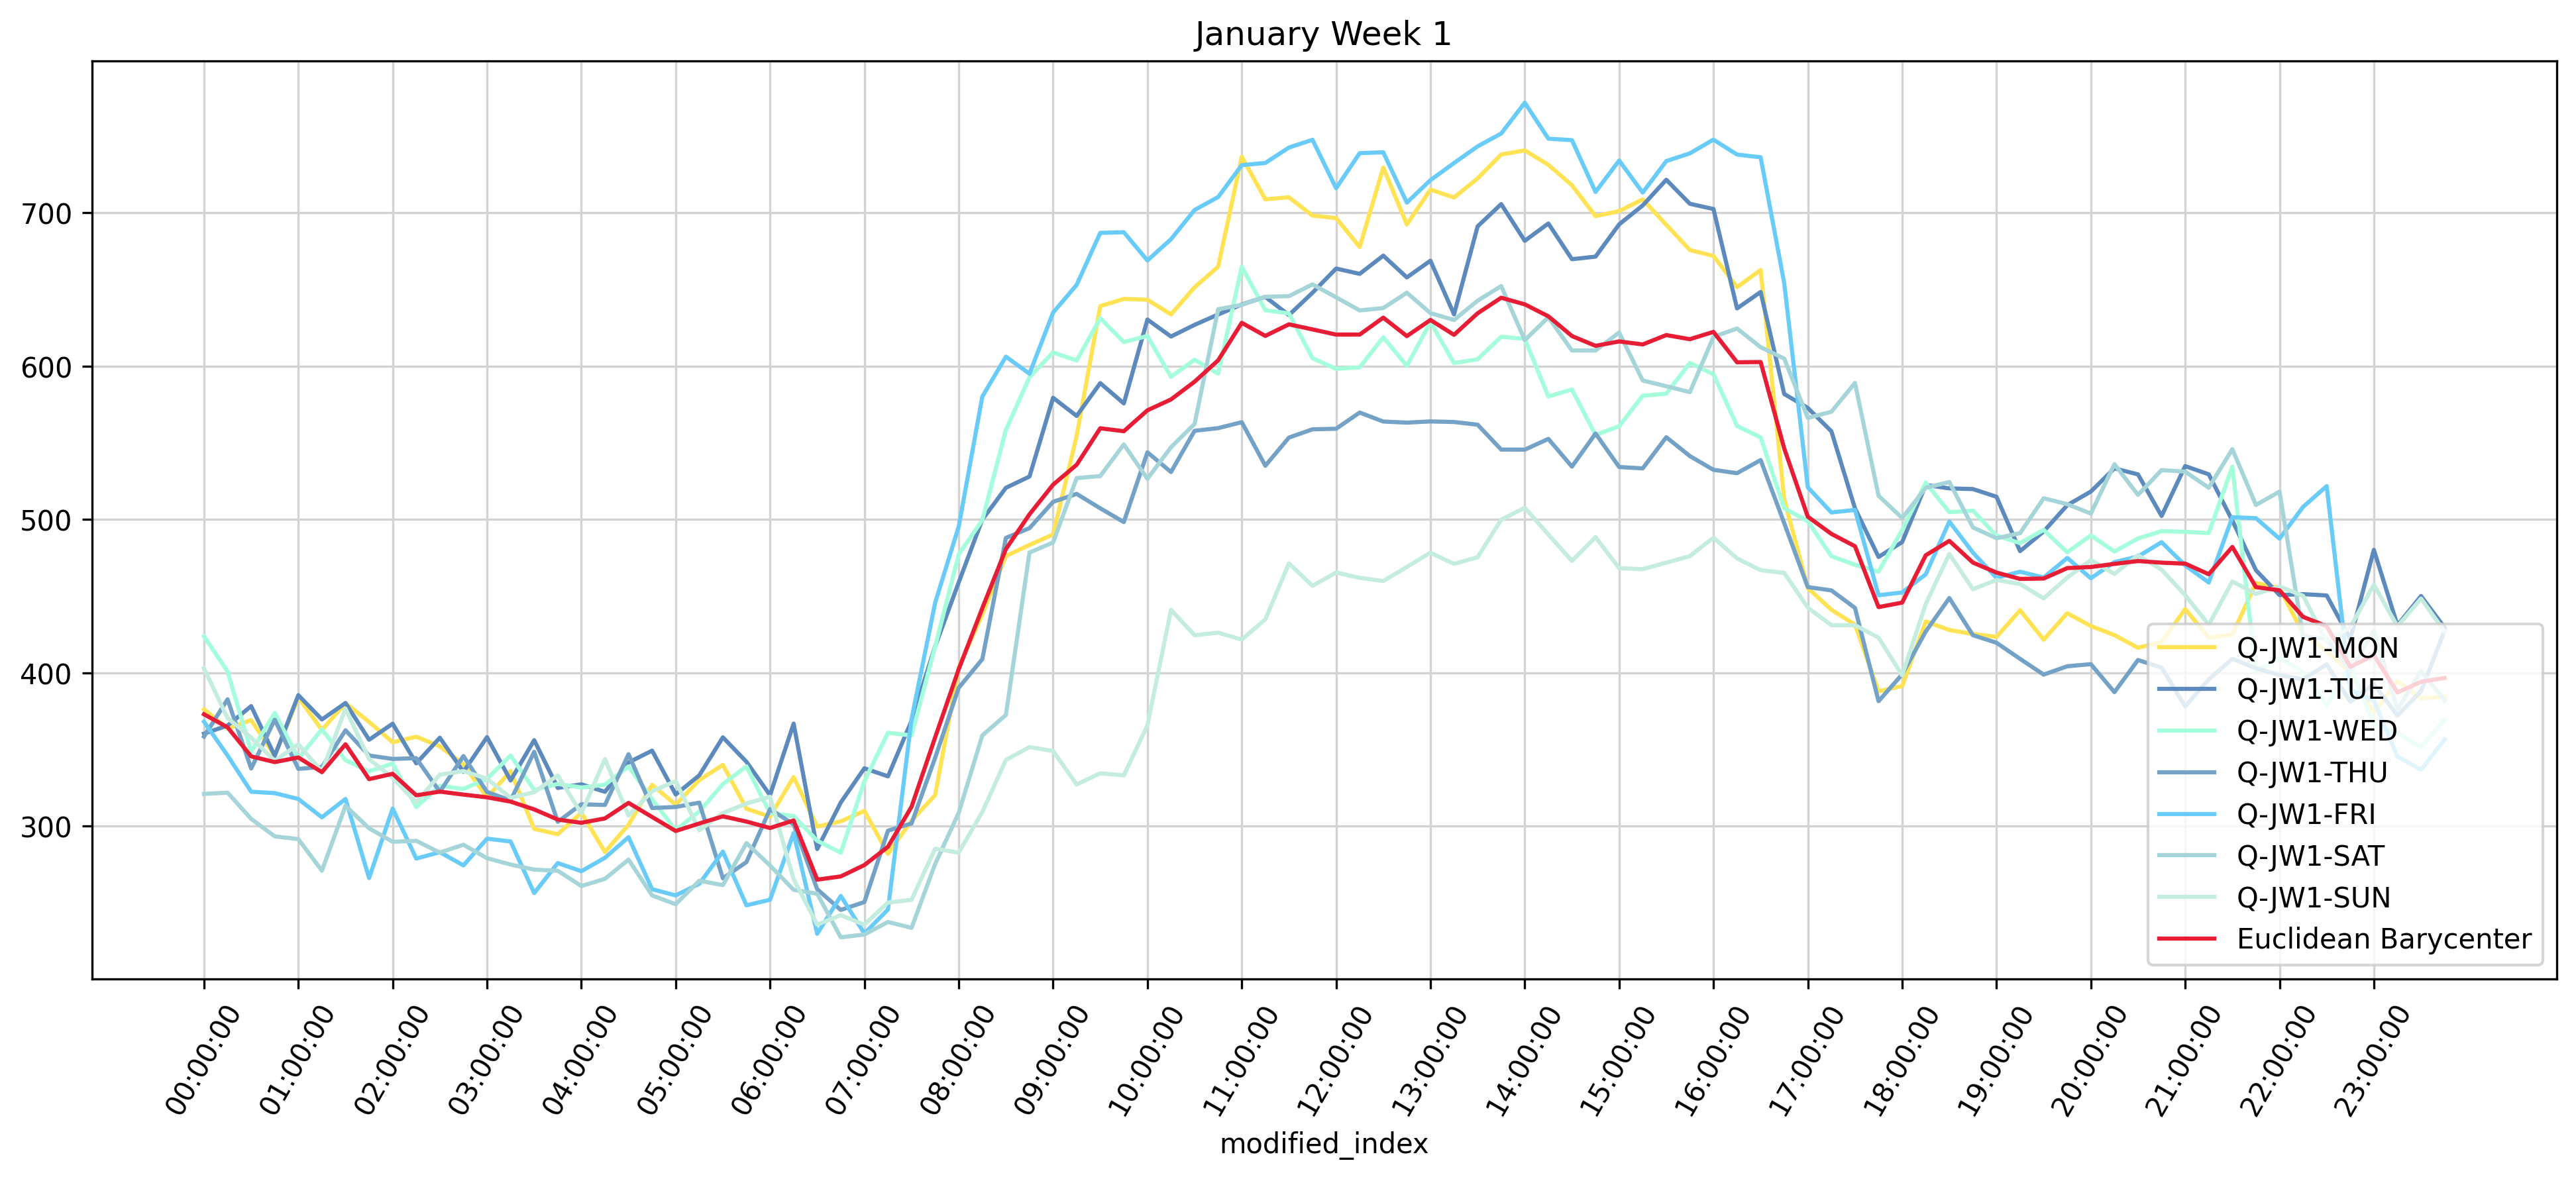

In [12]:
jan_wk1_Q_df = pd.read_csv('../data/subsequences/jan_wk1_Q.csv')
jan_wk1_Q_eba_df = get_eba_from_df(jan_wk1_Q_df)
plot_highlighted_eba(eba_df=jan_wk1_Q_eba_df,title="January Week 1")

# Fitting Barycenters on Power Data

## Real Power

In [13]:
jan_mondays_P_ebas = get_eba_from_df(pd.read_csv("../data/subsequences/jan_mondays_P.csv"))
jan_tuesdays_P_ebas = get_eba_from_df(pd.read_csv("../data/subsequences/jan_tuesdays_P.csv"))
jan_wednesdays_P_ebas = get_eba_from_df(pd.read_csv("../data/subsequences/jan_wednesdays_P.csv"))
jan_thursdays_P_ebas = get_eba_from_df(pd.read_csv("../data/subsequences/jan_thursdays_P.csv"))
jan_fridays_P_ebas = get_eba_from_df(pd.read_csv("../data/subsequences/jan_fridays_P.csv"))
jan_saturdays_P_ebas = get_eba_from_df(pd.read_csv("../data/subsequences/jan_saturdays_P.csv"))
jan_sundays_P_ebas = get_eba_from_df(pd.read_csv("../data/subsequences/jan_sundays_P.csv"))


#averaging February weekdays
feb_mondays_P_ebas = get_eba_from_df(pd.read_csv("../data/subsequences/feb_mondays_P.csv"))
feb_tuesdays_P_ebas = get_eba_from_df(pd.read_csv("../data/subsequences/feb_tuesdays_P.csv"))
feb_wednesdays_P_ebas = get_eba_from_df(pd.read_csv("../data/subsequences/feb_wednesdays_P.csv"))
feb_thursdays_P_ebas = get_eba_from_df(pd.read_csv("../data/subsequences/feb_thursdays_P.csv"))
feb_fridays_P_ebas = get_eba_from_df(pd.read_csv("../data/subsequences/feb_fridays_P.csv"))
feb_saturdays_P_ebas = get_eba_from_df(pd.read_csv("../data/subsequences/feb_saturdays_P.csv"))
feb_sundays_P_ebas = get_eba_from_df(pd.read_csv("../data/subsequences/feb_sundays_P.csv"))


#averaging all weekdays in January and february
jan_and_feb_mondays_P_ebas = get_eba_from_df(pd.read_csv("../data/subsequences/jan_and_feb_mondays_P.csv"))
jan_and_feb_tuesdays_P_ebas = get_eba_from_df(pd.read_csv("../data/subsequences/jan_and_feb_tuesdays_P.csv"))
jan_and_feb_wednesdays_P_ebas = get_eba_from_df(pd.read_csv("../data/subsequences/jan_and_feb_wednesdays_P.csv"))
jan_and_feb_thursdays_P_ebas = get_eba_from_df(pd.read_csv("../data/subsequences/jan_and_feb_thursdays_P.csv"))
jan_and_feb_fridays_P_ebas = get_eba_from_df(pd.read_csv("../data/subsequences/jan_and_feb_fridays_P.csv"))
jan_and_feb_saturdays_P_ebas = get_eba_from_df(pd.read_csv("../data/subsequences/jan_and_feb_saturdays_P.csv"))
jan_and_feb_sundays_P_ebas = get_eba_from_df(pd.read_csv("../data/subsequences/jan_and_feb_sundays_P.csv"))

#averaging weeks 1-4 in January
jan_wk1_P = pd.read_csv('../data/subsequences/jan_wk1_P.csv')
jan_wk2_P = pd.read_csv('../data/subsequences/jan_wk2_P.csv')
jan_wk3_P = pd.read_csv('../data/subsequences/jan_wk3_P.csv')
jan_wk4_P = pd.read_csv('../data/subsequences/jan_wk4_P.csv')

jan_wk1_P_ebas = get_eba_from_df(jan_wk1_P)
jan_wk2_P_ebas = get_eba_from_df(jan_wk2_P)
jan_wk3_P_ebas = get_eba_from_df(jan_wk3_P)
jan_wk4_P_ebas = get_eba_from_df(jan_wk4_P)

#averagnig weeks 1-3 in February
feb_wk1_P = pd.read_csv('../data/subsequences/feb_wk1_P.csv')
feb_wk2_P = pd.read_csv('../data/subsequences/feb_wk2_P.csv')
feb_wk3_P = pd.read_csv('../data/subsequences/feb_wk3_P.csv')

feb_wk1_P_ebas = get_eba_from_df(feb_wk1_P)
feb_wk2_P_ebas = get_eba_from_df(feb_wk2_P)
feb_wk3_P_ebas = get_eba_from_df(feb_wk3_P)

#averaging the month of January
jan_P_df = jan_wk1_P.join(jan_wk2_P).join(jan_wk3_P).join(jan_wk4_P)
jan_P_eba = get_eba_from_df(jan_P_df)

#averagnig the month of February
feb_P_df = feb_wk1_P.join(feb_wk2_P).join(feb_wk3_P)
feb_P_eba = get_eba_from_df(feb_P_df)


#averagnig january and february
jan_and_feb_P = jan_P_df.join(feb_P_df)
jan_and_feb_P_ebas = get_eba_from_df(jan_and_feb_P)

## Reactive Data

In [14]:
jan_mondays_Q_ebas = get_eba_from_df(pd.read_csv("../data/subsequences/jan_mondays_Q.csv"))
jan_tuesdays_Q_ebas = get_eba_from_df(pd.read_csv("../data/subsequences/jan_tuesdays_Q.csv"))
jan_wednesdays_Q_ebas = get_eba_from_df(pd.read_csv("../data/subsequences/jan_wednesdays_Q.csv"))
jan_thursdays_Q_ebas = get_eba_from_df(pd.read_csv("../data/subsequences/jan_thursdays_Q.csv"))
jan_fridays_Q_ebas = get_eba_from_df(pd.read_csv("../data/subsequences/jan_fridays_Q.csv"))
jan_saturdays_Q_ebas = get_eba_from_df(pd.read_csv("../data/subsequences/jan_saturdays_Q.csv"))
jan_sundays_Q_ebas = get_eba_from_df(pd.read_csv("../data/subsequences/jan_sundays_Q.csv"))


#averaging February weekdays
feb_mondays_Q_ebas = get_eba_from_df(pd.read_csv("../data/subsequences/feb_mondays_Q.csv"))
feb_tuesdays_Q_ebas = get_eba_from_df(pd.read_csv("../data/subsequences/feb_tuesdays_Q.csv"))
feb_wednesdays_Q_ebas = get_eba_from_df(pd.read_csv("../data/subsequences/feb_wednesdays_Q.csv"))
feb_thursdays_Q_ebas = get_eba_from_df(pd.read_csv("../data/subsequences/feb_thursdays_Q.csv"))
feb_fridays_Q_ebas = get_eba_from_df(pd.read_csv("../data/subsequences/feb_fridays_Q.csv"))
feb_saturdays_Q_ebas = get_eba_from_df(pd.read_csv("../data/subsequences/feb_saturdays_Q.csv"))
feb_sundays_Q_ebas = get_eba_from_df(pd.read_csv("../data/subsequences/feb_sundays_Q.csv"))


#averaging all weekdays in January and february
jan_and_feb_mondays_Q_ebas = get_eba_from_df(pd.read_csv("../data/subsequences/jan_and_feb_mondays_Q.csv"))
jan_and_feb_tuesdays_Q_ebas = get_eba_from_df(pd.read_csv("../data/subsequences/jan_and_feb_tuesdays_Q.csv"))
jan_and_feb_wednesdays_Q_ebas = get_eba_from_df(pd.read_csv("../data/subsequences/jan_and_feb_wednesdays_Q.csv"))
jan_and_feb_thursdays_Q_ebas = get_eba_from_df(pd.read_csv("../data/subsequences/jan_and_feb_thursdays_Q.csv"))
jan_and_feb_fridays_Q_ebas = get_eba_from_df(pd.read_csv("../data/subsequences/jan_and_feb_fridays_Q.csv"))
jan_and_feb_saturdays_Q_ebas = get_eba_from_df(pd.read_csv("../data/subsequences/jan_and_feb_saturdays_Q.csv"))
jan_and_feb_sundays_Q_ebas = get_eba_from_df(pd.read_csv("../data/subsequences/jan_and_feb_sundays_Q.csv"))

#averaging weeks 1-4 in January
jan_wk1_Q = pd.read_csv('../data/subsequences/jan_wk1_Q.csv')
jan_wk2_Q = pd.read_csv('../data/subsequences/jan_wk2_Q.csv')
jan_wk3_Q = pd.read_csv('../data/subsequences/jan_wk3_Q.csv')
jan_wk4_Q = pd.read_csv('../data/subsequences/jan_wk4_Q.csv')

jan_wk1_Q_ebas = get_eba_from_df(jan_wk1_Q)
jan_wk2_Q_ebas = get_eba_from_df(jan_wk2_Q)
jan_wk3_Q_ebas = get_eba_from_df(jan_wk3_Q)
jan_wk4_Q_ebas = get_eba_from_df(jan_wk4_Q)

#averagnig weeks 1-3 in February
feb_wk1_Q = pd.read_csv('../data/subsequences/feb_wk1_Q.csv')
feb_wk2_Q = pd.read_csv('../data/subsequences/feb_wk2_Q.csv')
feb_wk3_Q = pd.read_csv('../data/subsequences/feb_wk3_Q.csv')

feb_wk1_Q_ebas = get_eba_from_df(feb_wk1_Q)
feb_wk2_Q_ebas = get_eba_from_df(feb_wk2_Q)
feb_wk3_Q_ebas = get_eba_from_df(feb_wk3_Q)

#averaging the month of January
jan_Q_df = jan_wk1_Q.join(jan_wk2_Q).join(jan_wk3_Q).join(jan_wk4_Q)
jan_Q_eba = get_eba_from_df(jan_Q_df)

#averagnig the month of February
feb_Q_df = feb_wk1_Q.join(feb_wk2_Q).join(feb_wk3_Q)
feb_Q_eba = get_eba_from_df(feb_Q_df)


#averagnig january and february
jan_and_feb_Q = jan_P_df.join(feb_Q_df)
jan_and_feb_Q_ebas = get_eba_from_df(jan_and_feb_Q)

## Saving fits

In [15]:
import os
import pandas as pd

directory = "../data/clustering/euclidean_barycenter_averages"

# Create the directory if it doesn't exist
if not os.path.exists(directory):
    os.makedirs(directory)

# Get all variable names in the current environment
variables = [var for var in dir() if (var.endswith("_eba") or var.endswith("_ebas")) and isinstance(eval(var), pd.DataFrame)]

# Save each dataframe in the directory
for var in variables:
    filename = os.path.join(directory, var + ".csv")
    eval(var).to_csv(filename, index=False)


